In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 1. Load mcs data

In [2]:
pred_main_folder= "02_SCC_pred_folder_1030_iams_sspbase"

pred_result_folder_fund_prtp1= pred_main_folder + "/fund/prtp1"
pred_result_folder_fund_prtp15= pred_main_folder + "/fund/prtp15"
pred_result_folder_fund_prtp3= pred_main_folder + "/fund/prtp3"



pred_result_folder_page_prtp1= pred_main_folder + "/page/prtp1"
pred_result_folder_page_prtp15= pred_main_folder + "/page/prtp15"
pred_result_folder_page_prtp3= pred_main_folder + "/page/prtp3"



pred_result_folder_dice_prtp1= pred_main_folder + "/dice/prtp1"
pred_result_folder_dice_prtp15= pred_main_folder + "/dice/prtp15"
pred_result_folder_dice_prtp3= pred_main_folder + "/dice/prtp3"




pred_result_folder_ssp_base_prtp1= pred_main_folder + "/ssp_base/prtp1"
pred_result_folder_ssp_base_prtp15= pred_main_folder + "/ssp_base/prtp15"
pred_result_folder_ssp_base_prtp3= pred_main_folder + "/ssp_base/prtp3"


In [3]:
from glob import glob

filename_fund_prtp1= glob(pred_result_folder_fund_prtp1 + "/" + "*.csv") 
filename_fund_prtp15= glob(pred_result_folder_fund_prtp15 + "/" + "*.csv")
filename_fund_prtp3= glob(pred_result_folder_fund_prtp3 + "/" + "*.csv")

filename_page_prtp1= glob(pred_result_folder_page_prtp1 + "/" + "*.csv")
filename_page_prtp15= glob(pred_result_folder_page_prtp15 + "/" + "*.csv")
filename_page_prtp3= glob(pred_result_folder_page_prtp3 + "/" + "*.csv")


filename_dice_prtp1= glob(pred_result_folder_dice_prtp1 + "/" + "*.csv")
filename_dice_prtp15= glob(pred_result_folder_dice_prtp15 + "/" + "*.csv")
filename_dice_prtp3= glob(pred_result_folder_dice_prtp3 + "/" + "*.csv")


filename_ssp_base_prtp1= glob(pred_result_folder_ssp_base_prtp1 + "/" + "*.csv")
filename_ssp_base_prtp15= glob(pred_result_folder_ssp_base_prtp15 + "/" + "*.csv")
filename_ssp_base_prtp3= glob(pred_result_folder_ssp_base_prtp3 + "/" + "*.csv")

In [4]:
len(filename_fund_prtp1), len(filename_page_prtp1), len(filename_dice_prtp1), len(filename_ssp_base_prtp1)

(50, 50, 50, 250)

In [5]:
num_data_iam= 50
num_data_base= 250

In [6]:
fund_prtp1= []
fund_prtp15= []
fund_prtp3= []

page_prtp1= []
page_prtp15= []
page_prtp3= []

dice_prtp1= []
dice_prtp15= []
dice_prtp3= []


for i in range(num_data_iam):
    fund_prtp1.append(pd.read_csv(filename_fund_prtp1[i], index_col=0))
    fund_prtp15.append(pd.read_csv(filename_fund_prtp15[i], index_col=0))
    fund_prtp3.append(pd.read_csv(filename_fund_prtp3[i], index_col=0))

    page_prtp1.append(pd.read_csv(filename_page_prtp1[i], index_col=0))
    page_prtp15.append(pd.read_csv(filename_page_prtp15[i], index_col=0))
    page_prtp3.append(pd.read_csv(filename_page_prtp3[i], index_col=0))

    dice_prtp1.append(pd.read_csv(filename_dice_prtp1[i], index_col=0))
    dice_prtp15.append(pd.read_csv(filename_dice_prtp15[i], index_col=0))
    dice_prtp3.append(pd.read_csv(filename_dice_prtp3[i], index_col=0))

In [7]:
ssp_base_prtp1= []
ssp_base_prtp15= []
ssp_base_prtp3= []


for i in range(num_data_base):
    ssp_base_prtp1.append(pd.read_csv(filename_ssp_base_prtp1[i], index_col=0))
    ssp_base_prtp15.append(pd.read_csv(filename_ssp_base_prtp15[i], index_col=0))
    ssp_base_prtp3.append(pd.read_csv(filename_ssp_base_prtp3[i], index_col=0))


In [8]:
pd.concat([*ssp_base_prtp1]).max()

Year         2100.000000
scc_cs_5     1872.296963
scc_cs_6     3109.379322
scc_cs_7     7068.635653
scc_cs_8    13386.541110
dtype: float64

In [9]:
fund_prtp1[0]

,Year,scc_cs_5,scc_cs_6,scc_cs_7,scc_cs_8
0,2020,218.423929,293.004564,390.880176,404.260517
1,2021,223.359949,299.669310,397.683901,407.980906
2,2022,224.355717,300.806063,397.236879,404.310169
3,2023,226.494442,303.487153,399.254183,404.212502
4,2024,229.848196,307.763719,403.472871,406.867251
...,...,...,...,...,...
76,2096,330.004100,417.189319,487.449399,415.534317
77,2097,332.564239,415.885661,464.491756,341.228269
78,2098,331.134059,420.018802,490.678222,424.892662
79,2099,333.313829,422.644073,491.541400,420.805941


### All SCC results

In [14]:
all_scc_cols= list(fund_prtp1[0].columns[1:]) + list(fund_prtp15[0].columns[1:]) + list(fund_prtp3[0].columns[1:])
all_scc_cols

['scc_cs_5',
 'scc_cs_6',
 'scc_cs_7',
 'scc_cs_8',
 'scc_cs_1',
 'scc_cs_2',
 'scc_cs_3',
 'scc_cs_4',
 'scc_cs_9',
 'scc_cs_10',
 'scc_cs_11',
 'scc_cs_12']

In [15]:
all_scc_results= pd.concat([pd.concat([pd.concat([*fund_prtp15]), pd.concat([*fund_prtp1]).iloc[:, 1:], pd.concat([*fund_prtp3]).iloc[:, 1:]], axis=1),
                            pd.concat([pd.concat([*page_prtp15]), pd.concat([*page_prtp1]).iloc[:, 1:], pd.concat([*page_prtp3]).iloc[:, 1:]], axis=1),
                            pd.concat([pd.concat([*dice_prtp15]), pd.concat([*dice_prtp1]).iloc[:, 1:], pd.concat([*dice_prtp3]).iloc[:, 1:]], axis=1),
                            pd.concat([pd.concat([*ssp_base_prtp15]), pd.concat([*ssp_base_prtp1]).iloc[:, 1:], pd.concat([*ssp_base_prtp3]).iloc[:, 1:]], axis=1)
                            ]).reset_index(drop=True)

In [16]:
all_scc_results

,Year,scc_cs_1,scc_cs_2,scc_cs_3,scc_cs_4,scc_cs_5,scc_cs_6,scc_cs_7,scc_cs_8,scc_cs_9,scc_cs_10,scc_cs_11,scc_cs_12
0,2020,114.228257,151.407021,219.822190,248.272833,218.423929,293.004564,390.880176,404.260517,23.004901,27.995801,36.156201,38.733417
1,2021,116.702319,154.665871,222.789877,251.627055,223.359949,299.669310,397.683901,407.980906,23.851103,29.003592,37.299000,40.505106
2,2022,117.235190,155.194741,221.837162,249.537023,224.355717,300.806063,397.236879,404.310169,24.307014,29.477548,37.489927,40.409133
3,2023,118.363631,156.557351,222.553350,250.035022,226.494442,303.487153,399.254183,404.212502,24.835351,30.068462,38.044656,41.141407
4,2024,120.128745,158.770613,224.691090,252.596196,229.848196,307.763719,403.472871,406.867251,25.491449,30.827326,38.952338,42.590125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32395,2096,557.897157,988.965362,2769.964241,5313.440950,828.932565,1466.972501,3992.774228,7642.126078,191.500475,339.610915,1013.546740,1968.713478
32396,2097,557.103049,986.039339,2759.823394,5276.429375,829.229660,1464.897048,3984.013417,7599.758533,189.870404,336.130844,1002.028692,1943.637207
32397,2098,564.763655,1001.002742,2802.904959,5357.187152,841.294273,1488.509247,4048.317453,7725.233307,191.791087,340.278770,1015.199438,1958.328755
32398,2099,565.355848,1002.221671,2803.213966,5387.935928,840.168393,1487.150184,4036.656130,7737.578393,194.774556,345.664270,1031.929085,2008.399179


### For probability calc

In [17]:
import collections
from collections import Counter

def prob_calc(data_int, choose_year, interval_list= [0, 8000, 50]):
    ### get data for each year
    # test= data_int.loc[data_int.Year == choose_year].values.reshape(-1,)[:-1]
    test= data_int.loc[data_int.Year == choose_year].iloc[:, :-1].values.reshape(-1,)

    ### set inteval value (per 50)
    interval_choose= np.arange(interval_list[0], interval_list[1], interval_list[2])

    ### get count value for each int data
    df_count= pd.DataFrame.from_dict(collections.Counter(test), orient="index")
    df_count.columns = ["count_result"]
    df_count["int_value"]= df_count.index
    df_count= df_count.reset_index(drop=True)
    df_count



    ### sum count data based on the interval value
    mid_points= []

    for i in range(len(interval_choose[0:-1])):
        # print(i)
        mid_points.append(df_count.loc[(df_count.int_value >= interval_choose[i]) & (df_count.int_value < interval_choose[i+1])].count_result.sum())
    
    # last_point= df_count.loc[df_count.int_value > interval_choose[-2]].count_result.sum()
    last_point= df_count.loc[df_count.int_value >= interval_choose[-1]].count_result.sum()

    
    ### get probability value
    prob_df= pd.DataFrame({"interval_value": interval_choose,
                           "count_value": np.hstack([mid_points, last_point])
                           })
    
    prob_df["prob_value"] = prob_df.count_value.values / len(test)

    return df_count, prob_df
    

In [18]:
all_scc_cols

['scc_cs_5',
 'scc_cs_6',
 'scc_cs_7',
 'scc_cs_8',
 'scc_cs_1',
 'scc_cs_2',
 'scc_cs_3',
 'scc_cs_4',
 'scc_cs_9',
 'scc_cs_10',
 'scc_cs_11',
 'scc_cs_12']

In [19]:
all_prtp_scc_only_df_int= all_scc_results[all_scc_cols].round().astype("int")
all_prtp_scc_only_df_int["Year"] = all_scc_results.Year
all_prtp_scc_only_df_int

,scc_cs_5,scc_cs_6,scc_cs_7,scc_cs_8,scc_cs_1,scc_cs_2,scc_cs_3,scc_cs_4,scc_cs_9,scc_cs_10,scc_cs_11,scc_cs_12,Year
0,218,293,391,404,114,151,220,248,23,28,36,39,2020
1,223,300,398,408,117,155,223,252,24,29,37,41,2021
2,224,301,397,404,117,155,222,250,24,29,37,40,2022
3,226,303,399,404,118,157,223,250,25,30,38,41,2023
4,230,308,403,407,120,159,225,253,25,31,39,43,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32395,829,1467,3993,7642,558,989,2770,5313,192,340,1014,1969,2096
32396,829,1465,3984,7600,557,986,2760,5276,190,336,1002,1944,2097
32397,841,1489,4048,7725,565,1001,2803,5357,192,340,1015,1958,2098
32398,840,1487,4037,7738,565,1002,2803,5388,195,346,1032,2008,2099


In [20]:
def get_index_value(val_num, interval_list=[0, 8000, 50]):
    interval_choose= np.arange(interval_list[0], interval_list[1], interval_list[2])
    index_result = np.asarray(np.where(interval_choose <= val_num)).reshape(-1,)[-1]
    return index_result


### FIlter all extreme

In [23]:
all_prtp_scc_only_df_int_filter= all_prtp_scc_only_df_int[['scc_cs_5', 'scc_cs_6', 'scc_cs_7', 'scc_cs_1', 'scc_cs_2',
       'scc_cs_3', 'scc_cs_9', 'scc_cs_10', 'scc_cs_11',
       'scc_cs_12', 'Year']]

In [24]:
all_prtp_scc_only_df_int_filter.max()

scc_cs_5     1872
scc_cs_6     3109
scc_cs_7     7069
scc_cs_1     1210
scc_cs_2     2018
scc_cs_3     5050
scc_cs_9      455
scc_cs_10     782
scc_cs_11    2259
scc_cs_12    4906
Year         2100
dtype: int64

### Combine all

In [27]:
import seaborn as sns

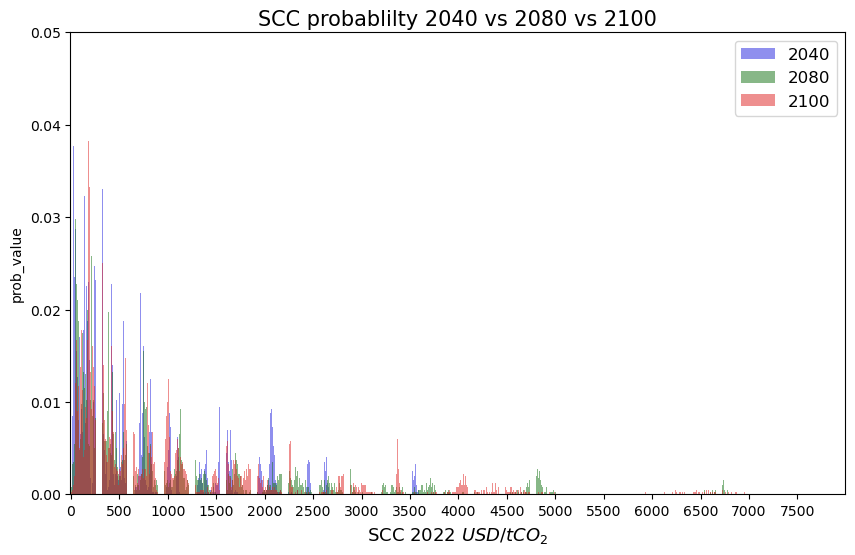

In [34]:
fs=15

start = 0
end = 8000
step = 10
interval_list= [start, end, step]

df_count_2020, prob_df_2020= prob_calc(data_int= all_prtp_scc_only_df_int_filter, 
                             choose_year= 2040,
                             interval_list= interval_list)

df_count_2080, prob_df_2080= prob_calc(data_int= all_prtp_scc_only_df_int_filter, 
                             choose_year= 2080,
                             interval_list= interval_list)

df_count_2100, prob_df_2100= prob_calc(data_int= all_prtp_scc_only_df_int_filter, 
                             choose_year= 2100,
                             interval_list= interval_list)


plt.figure(figsize=(10, 6))
ax= sns.barplot(data=prob_df_2020, x='interval_value', y='prob_value', color= 'blue', alpha=0.5, lw=4, label='2040',)
sns.barplot(data=prob_df_2080, x='interval_value', y='prob_value', color= 'green', alpha=0.5, lw=4, label='2080', ax=ax)
sns.barplot(data=prob_df_2100, x='interval_value', y='prob_value', color= 'red', alpha=0.5, lw=4, label='2100', ax=ax)


# Adjust x-axis ticks and labels
every_nth = 50

# Get the current tick locations and labels
ticks = ax.get_xticks()
labels = [item.get_text() for item in ax.get_xticklabels()]

# Set new tick locations and labels
ax.set_xticks([tick for idx, tick in enumerate(ticks) if idx % every_nth == 0])
ax.set_xticklabels([label for idx, label in enumerate(labels) if idx % every_nth == 0])
ax.set_ylim(0, 0.05)

plt.xlabel("SCC " + scc_unit, fontsize= fs-2, labelpad=5)
plt.title("SCC probablilty 2040 vs 2080 vs 2100", fontsize = fs, pad=5)


plt.legend(fontsize=fs-3)